## Training Model PCA (Eigenface) + SVM

In [35]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

### 1 Preprocessing Dataset
- Predic Face, Crop, Resize & Conver to Grayscale

In [36]:
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_default.xml')

image_list = []
labels = []

for folder in os.listdir("lfw_dataset"):
    for file in os.listdir("lfw_dataset/" + folder):
        img = cv2.imread("lfw_dataset/" + folder + "/" + file)
        
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        faces = face_cascade.detectMultiScale(img_gray, 1.3, 5)
        for (x, y, w, h) in faces:
            img_face = img_gray[y:y+h, x:x+w]  # crop face image 
            img_resize = cv2.resize(img_face, (100, 100)) # resize to 100 x 100 pixel
            
            image_list.append(img_resize)
            labels.append(folder) # append label (name) of image

In [37]:
len(image_list)

399

- save detected face into folder

In [38]:
if not os.path.exists("croped_face") :
    os.mkdir("croped_face")

In [39]:
face_folder = "croped_face"
for i in range(len(image_list)):
    
    # get image
    img = image_list[i]
    
    # check if folder exist. if not, create that folder    
    folder_path = os.path.join(face_folder, labels[i])
    if not os.path.exists(folder_path) :
        os.mkdir(folder_path)
        
    # remove image if exist
    file_name = labels[i] + "_%4d.jpg" % i
    file_path = os.path.join(*[face_folder, labels[i], file_name])
    if os.path.exists(file_path) :
        os.remove(file_path) # remove file using os.remove
        
    # save image
    cv2.imwrite(file_path, img)

### 2. Load Croped Face Dataset

In [40]:
image_faces= []
labels = []

for folder in os.listdir("croped_face"):
    for file in os.listdir("croped_face/" + folder):
        img = cv2.imread("croped_face/" + folder + "/" + file, 0)
        flatten_vector = img.flatten() 
        image_faces.append(flatten_vector)
        labels.append(folder) # append label (name) of image

In [41]:
image_faces[0].shape # 1D vector from 100x100 pixel face image 

(10000,)

### 3. Label Encoding (Scikit-Learn)

In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
labels

['Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell',
 'Colin_Powell

In [44]:
le = LabelEncoder()

le.fit(labels)

label_name = le.classes_
print(label_name)

['Colin_Powell' 'Donald_Rumsfeld' 'George_W_Bush' 'Gerhard_Schroeder'
 'Tony_Blair' 'Yunus']


In [45]:
labels_vec = le.transform(labels)

In [46]:
print(labels_vec)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5]


### 4. Split dataset (75% train, 25% test)

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(np.array(image_faces, dtype=np.float32), # input data
                                                    np.array(labels_vec),                    # target/output data 
                                                    test_size=0.25,                          # split ratio test (25%)
                                                    random_state=42)

In [49]:
print(X_train.shape, y_train.shape, X_test.shape,  y_test.shape)

(299, 10000) (299,) (100, 10000) (100,)


### 5. Calculate Eigenface using PCA

In [50]:
from sklearn.decomposition import PCA

In [51]:
h, w = 100, 100

In [52]:
K = 233
pca = PCA(n_components=K).fit(X_train)

- Show Eigenface

In [53]:
eigenfaces = pca.components_.reshape((K, h, w))

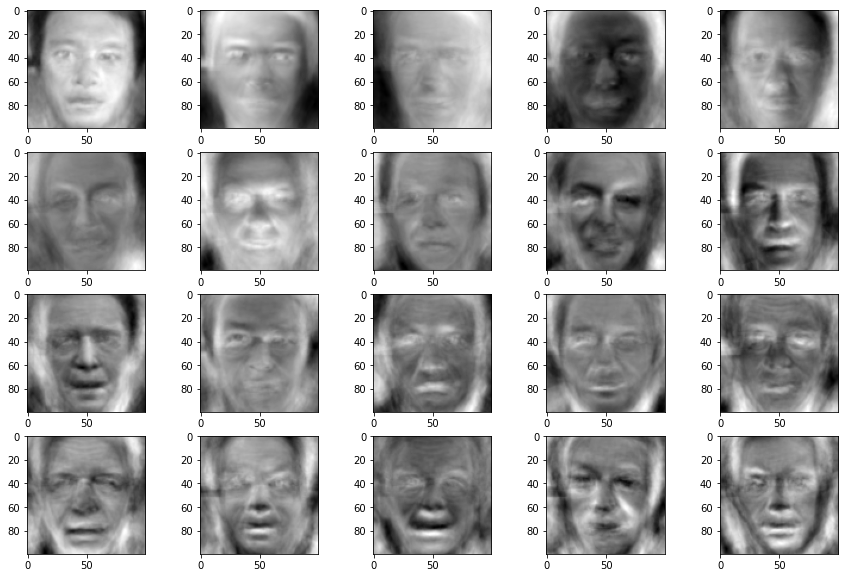

In [54]:
plt.figure(figsize=(15, 10))
for i in range(K)[:20]: # display 20 eigenface
    plt.subplot(4, 5, i + 1)
    plt.imshow(eigenfaces[i], cmap="gray")

- Projecting Input data to PCA

In [55]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

In [56]:
X_train[0].shape

(10000,)

In [57]:
X_train_pca[0].shape

(233,)

- save PCA model

In [58]:
import pickle

def save_model(model, filename, path=""): 
    with open(os.path.join(path, filename), 'wb') as out_name:
        pickle.dump(model, out_name, pickle.HIGHEST_PROTOCOL)

def read_model(filename, path=""):
    with open(os.path.join(path, filename), 'rb') as in_name:
        model = pickle.load(in_name)
        return model

In [59]:
save_model(pca, "pca_model.pkl")

### 6. Apply to SVM

In [60]:
from sklearn.svm import SVC

In [61]:
svm = SVC(kernel='linear', probability=True, C=100, gamma=0.001)

In [62]:
svm.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.001, kernel='linear', probability=True)

- predict result

In [63]:
y_pred = svm.predict(X_test_pca)

- save model

In [64]:
save_model(svm, "SVM_scikit_model.pkl")

### 7. Model Evaluation

In [65]:
import itertools
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [66]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(6, 6))
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

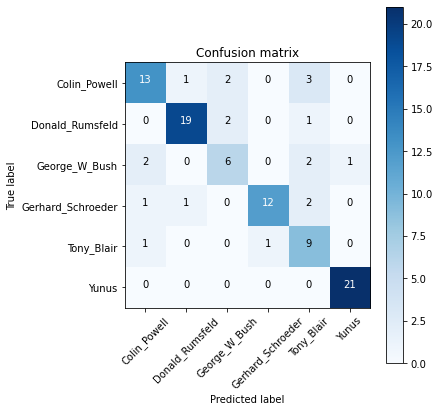

In [67]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=np.unique(labels_vec))
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plot_confusion_matrix(cnf_matrix, classes=label_name,normalize=False,
                      title='Confusion matrix')

In [68]:
print(classification_report(y_test, 
                            y_pred, 
                            target_names=label_name))

                   precision    recall  f1-score   support

     Colin_Powell       0.76      0.68      0.72        19
  Donald_Rumsfeld       0.90      0.86      0.88        22
    George_W_Bush       0.60      0.55      0.57        11
Gerhard_Schroeder       0.92      0.75      0.83        16
       Tony_Blair       0.53      0.82      0.64        11
            Yunus       0.95      1.00      0.98        21

         accuracy                           0.80       100
        macro avg       0.78      0.78      0.77       100
     weighted avg       0.82      0.80      0.80       100

